In [1]:
import numpy             as np
import pandas            as pd

from utils import (
    Adblocker,
    compare_CDF,
    barplot,
    pieplot,
    get_99p,
    generate_table
)

In [2]:
brave    = Adblocker(filename='data/brave_timings.json', color='#ff5500', label='Brave')
ghostery = Adblocker(filename='data/ghostery_timings.json', color='#00aff0', label='Ghostery')
ublock   = Adblocker(filename='data/ublock_timings.json', color='#800000', label='uBlock Origin')
duck     = Adblocker(filename='data/duckduckgo_timings.json', color='#58b792', label='DuckDuckGo')
abp      = Adblocker(filename='data/adblockplus_timings.json', color='#c70d2c', label='Adblock Plus')
url      = Adblocker(filename='data/url_timings.json', color='#1f3757', label='URL baseline')
tldts    = Adblocker(filename='data/tldts_timings.json', color='#98b3be', label='Tldts baseline')

### Composition of Requests

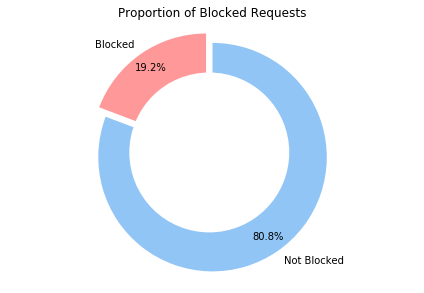

In [3]:
pieplot(ghostery, ublock, duck, brave, abp)

### Looking at all requests

#### **Ghostery vs uBlock vs Adblock Plus vs Brave vs DuckDuckGo**

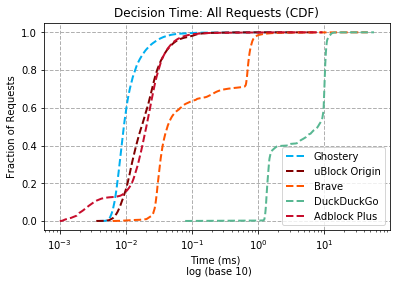

In [4]:
compare_CDF(
    ghostery,
    ublock,
    brave,
    duck,
    abp,
    attr="all",
    log_x=True,
    log_y=False,
    title='Decision Time: All Requests (CDF)'
)

#### **Ghostery vs uBlock vs Adblock Plus vs Brave vs DuckDuckGo** + Baselines

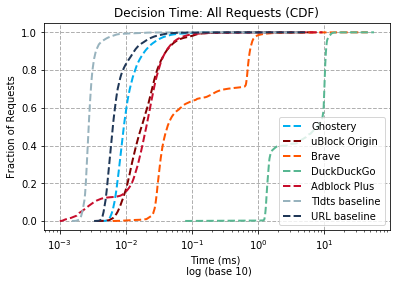

In [5]:
compare_CDF(
    ghostery,
    ublock,
    brave,
    duck,
    abp,
    tldts,
    url,
    attr="all",
    log_x=True,
    log_y=False,
    title='Decision Time: All Requests (CDF)'
)

#### Individual Comparisons
##### 1. **Ghostery vs uBlock**

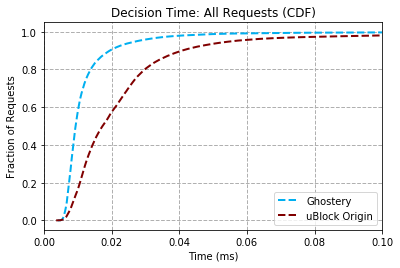

In [6]:
compare_CDF(
    ghostery, 
    ublock, 
    attr="all", 
    log_x=False, 
    log_y=False, 
    xlim=(0, 0.10), 
    title='Decision Time: All Requests (CDF)'
)

##### **2. Ghostery vs AdblockPlus**

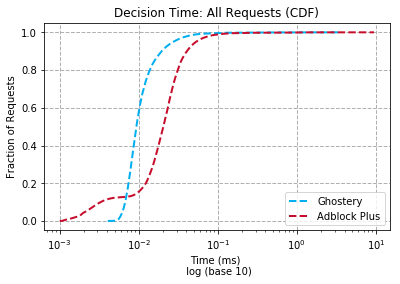

In [7]:
compare_CDF(
    ghostery,
    abp,
    attr="all",
    log_x=True,
    log_y=False,
    title='Decision Time: All Requests (CDF)'
)

### Comparing adblockers on requests that are NOT blocked
**Reminder**: This is the more common case: 82% of the requests are not blocked

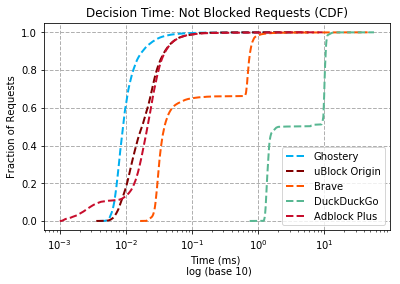

In [8]:
compare_CDF(
    ghostery,
    ublock,
    brave,
    duck,
    abp,
    attr="not_blocked",
    log_x=True,
    log_y=False,
    title='Decision Time: Not Blocked Requests (CDF)'
)

### Comparing adblockers on requests that are blocked

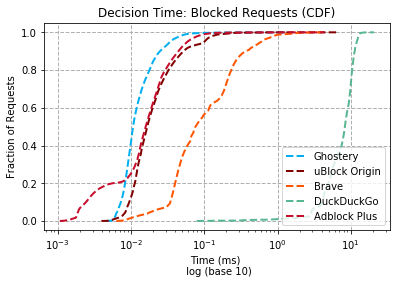

In [9]:
compare_CDF(
    ghostery,
    ublock,
    brave,
    duck,
    abp,
    attr="blocked",
    log_x=True,
    log_y=False,
    title='Decision Time: Blocked Requests (CDF)'
)

#### 99th percentile

In [10]:
p99 = pd.DataFrame({
    'request_type': ['_all', 'not_blocked', 'blocked'],
    'ghostery': get_99p(ghostery),
    'ublock': get_99p(ublock),
    'brave': get_99p(brave),
    'duck': get_99p(duck),
    'abp': get_99p(abp),
})

p99['ublock_vs_ghostery'] = p99.ublock / p99.ghostery
p99['brave_vs_ghostery'] = p99.brave / p99.ghostery
p99['duck_vs_ghostery'] = p99.duck / p99.ghostery
p99['abp_vs_ghostery'] = p99.abp / p99.ghostery

In [11]:
p99

,request_type,ghostery,ublock,brave,duck,abp,ublock_vs_ghostery,brave_vs_ghostery,duck_vs_ghostery,abp_vs_ghostery
0,_all,0.054939,0.120969,1.143503,12.594179,0.104002,2.201878,20.814048,229.239320,1.893045
1,not_blocked,0.054336,0.107080,1.134346,11.960517,0.105545,1.970701,20.876509,220.121411,1.942451
2,blocked,0.056325,0.165656,1.307950,13.131594,0.101439,2.941074,23.221482,233.139707,1.800959


#### Medians

In [12]:
medians = pd.DataFrame({
    'request_type': ['_all', 'not_blocked', 'blocked'],
    'ghostery': list(map(lambda x: np.median(x), [ghostery.all.raw, ghostery.not_blocked.raw, ghostery.blocked.raw])),
    'ublock': list(map(lambda x: np.median(x), [ublock.all.raw, ublock.not_blocked.raw, ublock.blocked.raw])),
    'brave': list(map(lambda x: np.median(x), [brave.all.raw, brave.not_blocked.raw, brave.blocked.raw])),
    'duck': list(map(lambda x: np.median(x), [duck.all.raw, duck.not_blocked.raw, duck.blocked.raw])),
    'abp': list(map(lambda x: np.median(x), [abp.all.raw, abp.not_blocked.raw, abp.blocked.raw]))

})


In [13]:
medians['ublock_vs_ghostery'] = medians.ublock / medians.ghostery
medians['brave_vs_ghostery'] = medians.brave / medians.ghostery
medians['duck_vs_ghostery'] = medians.duck / medians.ghostery
medians['abp_vs_ghostery'] = medians.abp / medians.ghostery

In [14]:
medians

,request_type,ghostery,ublock,brave,duck,abp,ublock_vs_ghostery,brave_vs_ghostery,duck_vs_ghostery,abp_vs_ghostery
0,_all,0.009324,0.017290,0.042551,8.044320,0.020434,1.854354,4.563599,862.754183,2.191549
1,not_blocked,0.009029,0.017522,0.038379,2.164159,0.021304,1.940743,4.250872,239.703051,2.359639
2,blocked,0.010679,0.016663,0.075977,8.311366,0.015872,1.560352,7.114617,778.290664,1.486281


In [15]:
for request_type in ['_all', 'not_blocked', 'blocked']:
    print('Request type', request_type)
    print(generate_table(p99, medians, request_type=request_type))

Request type _all

|               | 99% OF REQUESTS              | MEDIAN                       |
| ------------- | ---------------------------- | ---------------------------- |
| **Ghostery**  | **0.055ms**                  | **0.009ms**                  |
| uBlock Origin | 0.121ms (**2.2x slower**)    | 0.017ms (**1.9x slower**)    |
| Adblock Plus  | 0.104ms (**1.9x slower**)    | 0.020ms (**2.2x slower**)    |
| Brave         | 1.144ms (**20.8x slower**)   | 0.043ms (**4.6x slower**)    |
| DuckDuckGo    | 12.594ms (**229.2x slower**) | 8.044ms (**862.8x slower**)  |
    
Request type not_blocked

|               | 99% OF REQUESTS              | MEDIAN                       |
| ------------- | ---------------------------- | ---------------------------- |
| **Ghostery**  | **0.054ms**                  | **0.009ms**                  |
| uBlock Origin | 0.107ms (**2.0x slower**)    | 0.018ms (**1.9x slower**)    |
| Adblock Plus  | 0.106ms (**1.9x slower**)    | 0.021ms (**2.4x slowe

## Serialization and Deserialization timings

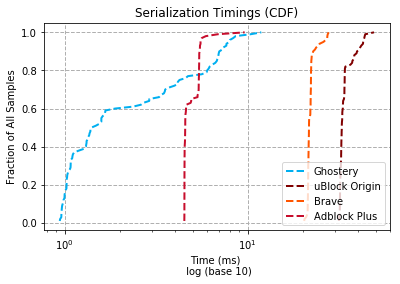

In [16]:
compare_CDF(
    ghostery,
    ublock,
    brave,
    abp,
    attr="serializationTimings",
    log_x=True,
    log_y=False,
    y_label="Fraction of All Samples",
    title='Serialization Timings (CDF)'
)

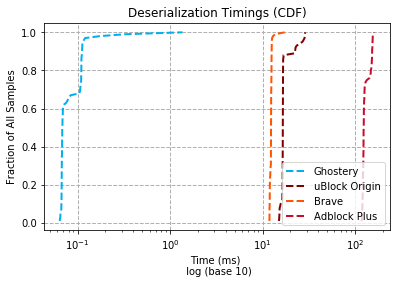

In [17]:
compare_CDF(
    ghostery, 
    ublock, 
    brave, 
    abp, 
    attr="deserializationTimings", 
    log_x=True, 
    log_y=False, 
    y_label="Fraction of All Samples", 
    title='Deserialization Timings (CDF)'
)

In [18]:
def compute_loading_medians(field, *adblockers):
    return pd.DataFrame({
        'adblocker': [adblocker.label for adblocker in adblockers],
        field: [np.median(getattr(adblocker, field).raw) for adblocker in adblockers],
    })

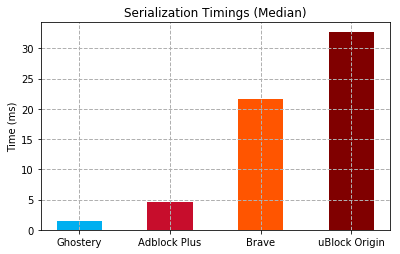

In [19]:
serialization_medians = compute_loading_medians('serializationTimings', ghostery, abp, brave, ublock)
barplot(
    serialization_medians, 
    'serializationTimings',
    title='Serialization Timings (Median)',
    ylabel="Time (ms)", 
    color=[ghostery.color, abp.color, brave.color, ublock.color], 
    save=True
)

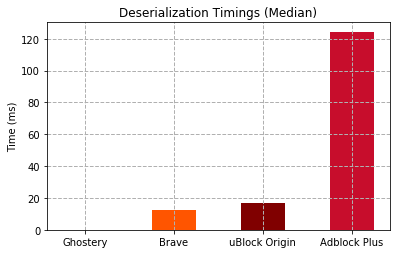

In [20]:
deserialization_medians = compute_loading_medians('deserializationTimings', ghostery, brave, ublock, abp)
barplot( 
    deserialization_medians, 
    'deserializationTimings', 
    ylabel="Time (ms)",
    title='Deserialization Timings (Median)',
    color=[ghostery.color, brave.color, ublock.color, abp.color], 
    save=True
)

In [21]:
deserialization_medians

,adblocker,deserializationTimings
0,Ghostery,0.068432
1,Brave,12.352528
2,uBlock Origin,16.567269
3,Adblock Plus,124.080477


In [22]:
119.575440/0.032526

3676.3032650802434

## Serialized Size

In [23]:
size_medians = pd.DataFrame({
    'adblocker': [abp.label, ghostery.label, brave.label, ublock.label],
    'Cache Size': [abp.cacheSize, ghostery.cacheSize, brave.cacheSize, ublock.cacheSize]
})

size_medians['Cache Size'] /= (10**6)

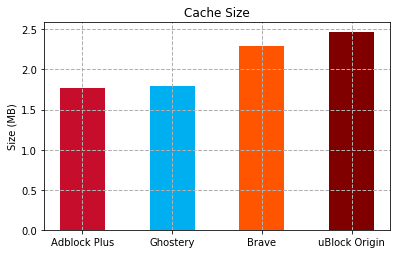

In [24]:
barplot(
    size_medians, 
    'Cache Size', 
    ylabel="Size (MB)", 
    color=[abp.color, ghostery.color, brave.color, ublock.color], 
    save=True
)

### Memory Usage

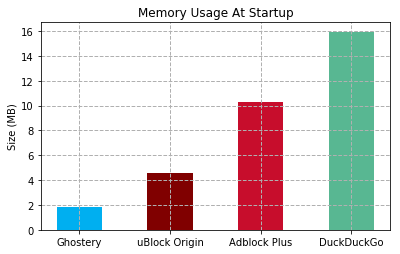

In [25]:
memory_medians = pd.DataFrame({
    'adblocker': [ghostery.label, ublock.label, abp.label, duck.label],
    'Memory Usage at Startup': [1.802, 4.599, 10.320, 15.910],
})


barplot(
    memory_medians, 
    'Memory Usage at Startup', 
    ylabel="Size (MB)", 
    color=[ghostery.color, ublock.color, abp.color, duck.color], 
    save=True
)

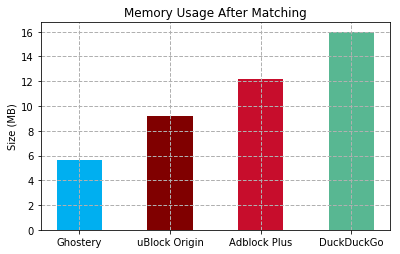

In [26]:
memory_medians = pd.DataFrame({
    'adblocker': [ghostery.label, ublock.label, abp.label, duck.label],
    'Memory Usage after matching': [5.673, 9.216, 12.178, 15.962]
})


barplot(
    memory_medians, 
    'Memory Usage after matching', 
    ylabel="Size (MB)", 
    color=[ghostery.color, ublock.color, abp.color, duck.color], 
    save=True
)

### Time to Parse Lists

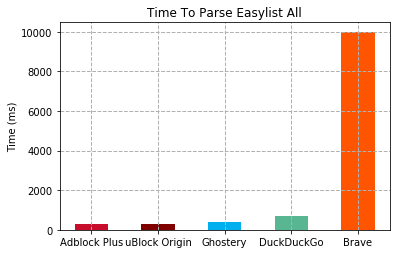

In [27]:
time2parse_medians = pd.DataFrame({
    'adblocker': [abp.label, ublock.label, ghostery.label, duck.label, brave.label],
    'Time to parse Easylist All': [abp.parsingTime, ublock.parsingTime, ghostery.parsingTime, duck.parsingTime, brave.parsingTime]
})

barplot(
    time2parse_medians, 
    'Time to parse Easylist All', 
    ylabel="Time (ms)", 
    color=[abp.color, ublock.color, ghostery.color, duck.color, brave.color], 
    save=True
)

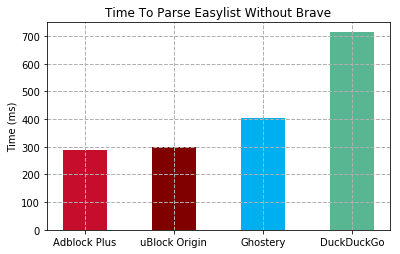

In [28]:
time2parse_medians = pd.DataFrame({
    'adblocker': [abp.label, ublock.label, ghostery.label, duck.label],
    'Time to parse Easylist Without Brave': [abp.parsingTime, ublock.parsingTime, ghostery.parsingTime, duck.parsingTime]
})

barplot(
    time2parse_medians, 
    'Time to parse Easylist Without Brave', 
    ylabel="Time (ms)", 
    color=[abp.color, ublock.color, ghostery.color, duck.color], 
    save=True
)